In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [6]:
# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head(5)

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [8]:
# Let us check if the train data is balanced (the image count is less anyways, god help me!!)
train['target'].value_counts()

mohiniyattam     50
odissi           49
kathakali        47
bharatanatyam    47
kuchipudi        46
sattriya         45
kathak           44
manipuri         36
Name: target, dtype: int64

In [10]:
# Very close, almost balanced. Let us leave it to that for the time being.

In [13]:
# Image directories
train_dir = "train/"
test_dir = "test/"

train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

### Train Set

In [14]:
# Load all train images in size 200 X 200

train_images = []
train_labels = []

for img in train_files:
    # Append Images after resizing
    train_images.append(cv2.resize(cv2.imread(train_dir + img), (200, 200), cv2.INTER_CUBIC)) # INTER_CUBIC as its efficient.
    # Append Labels
    if img in list(train['Image']):
        train_labels.append(train.loc[train['Image'] == img, 'target'].values[0])

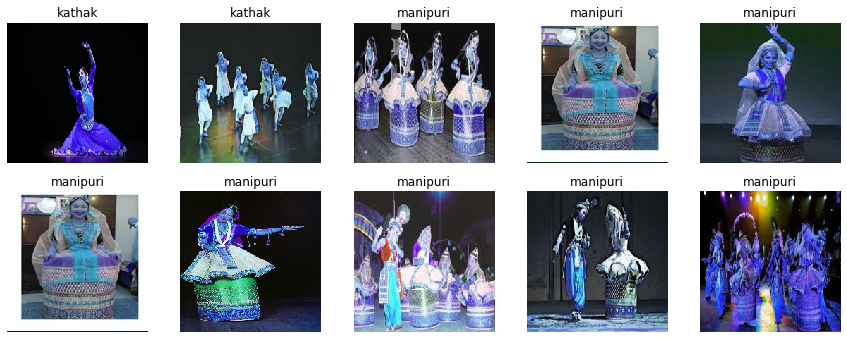

In [28]:
# Visualize first 10 Images.

plt.figure(figsize = (15, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i])
    plt.title(train_labels[i])
    plt.axis("off")

### Test Set

In [31]:
test_images = []

for img in test_files:
    # Append Images after resizing
    test_images.append(cv2.resize(cv2.imread(test_dir + img), (200, 200), cv2.INTER_CUBIC)) # INTER_CUBIC as its efficient.

### Label Encode the target variable

In [43]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
train_labels = enc.fit_transform(train_labels)

### Convert training data to numpy array and reshape

In [45]:
train_images = np.array(train_images).reshape(-1, 200, 200, 3)

### Train test split

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.3, random_state=42)

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(254, 200, 200, 3)
(254,)
(110, 200, 200, 3)
(110,)
